![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Modelowanie języka</h1>
<h2> 2. <i>Języki</i>  [wykład]</h2> 
<h3> Filip Graliński (2022)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)



## Języki i ich prawa



Jakim rozkładom statystycznym podlegają języki?



### Język naturalny albo „Pan Tadeusz” w liczbach



Przygotujmy najpierw „infrastrukturę” do *segmentacji* tekstu na różnego rodzaju jednostki.
Używać będziemy generatorów.

**Pytanie** Dlaczego generatory zamiast list?



In [1]:
import requests

url = 'https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt'
pan_tadeusz = requests.get(url).content.decode('utf-8')

pan_tadeusz[100:150]

'Księga pierwsza\r\n\r\n\r\n\r\nGospodarstwo\r\n\r\nPowrót pani'

#### Znaki



In [2]:
from itertools import islice

def get_characters(t):
    yield from t

list(islice(get_characters(pan_tadeusz), 100, 150))

['K',
 's',
 'i',
 'ę',
 'g',
 'a',
 ' ',
 'p',
 'i',
 'e',
 'r',
 'w',
 's',
 'z',
 'a',
 '\r',
 '\n',
 '\r',
 '\n',
 '\r',
 '\n',
 '\r',
 '\n',
 'G',
 'o',
 's',
 'p',
 'o',
 'd',
 'a',
 'r',
 's',
 't',
 'w',
 'o',
 '\r',
 '\n',
 '\r',
 '\n',
 'P',
 'o',
 'w',
 'r',
 'ó',
 't',
 ' ',
 'p',
 'a',
 'n',
 'i']

In [3]:
from collections import Counter

c = Counter(get_characters(pan_tadeusz))

c

Counter({'A': 698,
         'd': 11465,
         'a': 30979,
         'm': 10269,
         ' ': 63444,
         'M': 585,
         'i': 29353,
         'c': 14153,
         'k': 12362,
         'e': 25343,
         'w': 14625,
         'z': 22741,
         '\r': 10851,
         '\n': 10851,
         'P': 1265,
         'n': 15505,
         'T': 971,
         'u': 7699,
         's': 15255,
         'y': 13732,
         'l': 6677,
         'o': 23050,
         't': 10757,
         'j': 6586,
         'L': 316,
         'I': 795,
         'S': 1045,
         'B': 567,
         'N': 793,
         '9': 8,
         '7': 2,
         '8': 10,
         '-': 33,
         '3': 3,
         '2': 6,
         '4': 2,
         '5': 2,
         'K': 683,
         'ę': 5534,
         'g': 4775,
         'p': 8031,
         'r': 15328,
         'G': 358,
         'ó': 3097,
         '—': 720,
         ',': 9130,
         'ł': 10059,
         'W': 1258,
         'ż': 3334,
         'ś': 2524,
         'ą

Napiszmy pomocniczą funkcję, która zwraca **listę frekwencyjną**.

Counter({' ': 63444, 'a': 30979, 'i': 29353, 'e': 25343, 'o': 23050, 'z': 22741, 'n': 15505, 'r': 15328, 's': 15255, 'w': 14625, 'c': 14153, 'y': 13732, 'k': 12362, 'd': 11465, '\r': 10851, '\n': 10851, 't': 10757, 'm': 10269, 'ł': 10059, ',': 9130, 'p': 8031, 'u': 7699, 'l': 6677, 'j': 6586, 'b': 5753, 'ę': 5534, 'ą': 4794, 'g': 4775, 'h': 3915, 'ż': 3334, 'ó': 3097, 'ś': 2524, '.': 2380, 'ć': 1956, ';': 1445, 'P': 1265, 'W': 1258, ':': 1152, '!': 1083, 'S': 1045, 'T': 971, 'I': 795, 'N': 793, 'Z': 785, 'J': 729, '—': 720, 'A': 698, 'K': 683, 'ń': 651, 'M': 585, 'B': 567, 'O': 567, 'C': 556, 'D': 552, '«': 540, '»': 538, 'R': 489, '?': 441, 'ź': 414, 'f': 386, 'G': 358, 'L': 316, 'H': 309, 'Ż': 219, 'U': 184, '…': 157, '\*': 150, '(': 76, ')': 76, 'Ś': 71, 'F': 47, 'é': 43, '-': 33, 'Ł': 24, 'E': 23, '/': 19, 'Ó': 13, '8': 10, '9': 8, '2': 6, 'v': 5, 'Ź': 4, '1': 4, '3': 3, 'x': 3, 'V': 3, '7': 2, '4': 2, '5': 2, 'q': 2, 'æ': 2, 'à': 1, 'Ć': 1, '6': 1, '0': 1})



In [4]:
from collections import Counter
from collections import OrderedDict

def freq_list(g, top=None):
  c = Counter(g)

  if top is None:
     items = c.items()
  else:
     items = c.most_common(top)

  return OrderedDict(sorted(items, key=lambda t: -t[1]))

freq_list(get_characters(pan_tadeusz), top=8)

OrderedDict([(' ', 63444),
             ('a', 30979),
             ('i', 29353),
             ('e', 25343),
             ('o', 23050),
             ('z', 22741),
             ('n', 15505),
             ('r', 15328)])

) missing from current font.
  plt.savefig(fname)


'02_Jezyki/pt-chars.png'

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


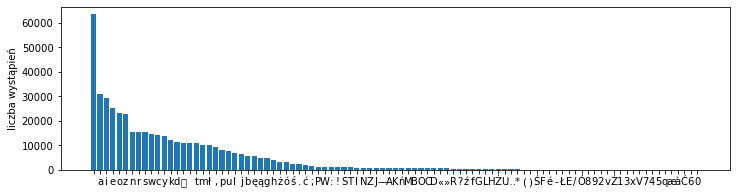

In [5]:
import matplotlib.pyplot as plt
from collections import OrderedDict

def rang_freq_with_labels(name, g, top=None):
   freq = freq_list(g, top)

   plt.figure(figsize=(12, 3))
   plt.ylabel('liczba wystąpień')

   plt.bar(freq.keys(), freq.values())

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_freq_with_labels('pt-chars', get_characters(pan_tadeusz))

#### Słowa



Co rozumiemy pod pojęciem słowa czy wyrazu, nie jest oczywiste. W praktyce zależy to od wyboru **tokenizatora**.

Załóżmy, że przez wyraz rozumieć będziemy nieprzerwany ciąg liter bądź cyfr (oraz gwiazdek
— to za chwilę ułatwi nam analizę pewnego tekstu…).



In [6]:
from itertools import islice
import regex as re

def get_words(t):
  for m in re.finditer(r'[\p{L}0-9\*]+', t):
     yield m.group(0)

list(islice(get_words(pan_tadeusz), 100, 130))

['Ty',
 'co',
 'gród',
 'zamkowy',
 'Nowogródzki',
 'ochraniasz',
 'z',
 'jego',
 'wiernym',
 'ludem',
 'Jak',
 'mnie',
 'dziecko',
 'do',
 'zdrowia',
 'powróciłaś',
 'cudem',
 'Gdy',
 'od',
 'płaczącej',
 'matki',
 'pod',
 'Twoją',
 'opiekę',
 'Ofiarowany',
 'martwą',
 'podniosłem',
 'powiekę',
 'I',
 'zaraz']

Zobaczmy 20 najczęstszych wyrazów.



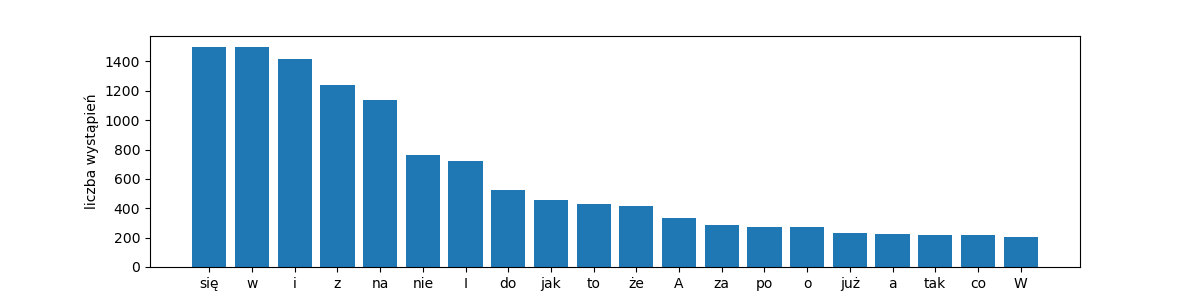

In [1]:
rang_freq_with_labels('pt-words-20', get_words(pan_tadeusz), top=20)

Zobaczmy pełny obraz, już bez etykiet.



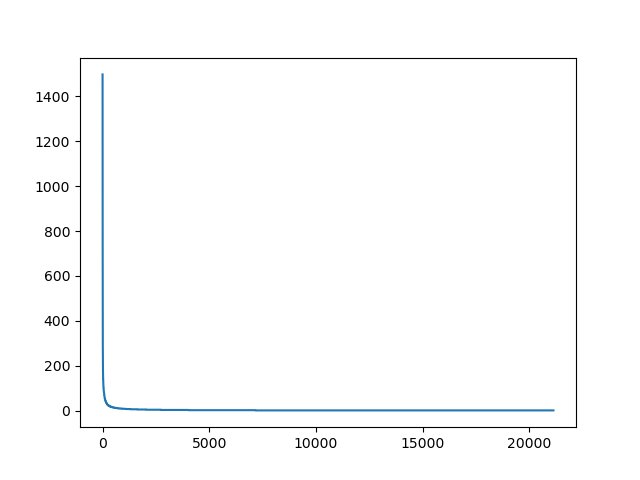

In [1]:
import matplotlib.pyplot as plt
from math import log

def rang_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot(range(1, len(freq.values())+1), freq.values())

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_freq('pt-words', get_words(pan_tadeusz))

Widać, jak różne skale obejmuje ten wykres. Zastosujemy logartm,
najpierw tylko do współrzędnej y.



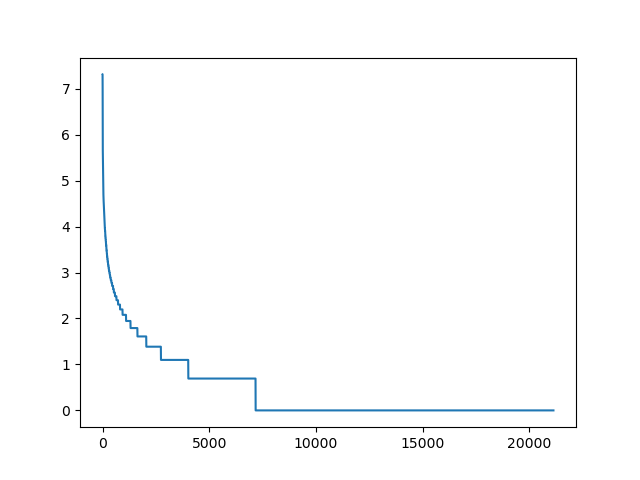

In [1]:
import matplotlib.pyplot as plt
from math import log

def rang_log_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot(range(1, len(freq.values())+1), [log(y) for y in freq.values()])

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_log_freq('pt-words-log', get_words(pan_tadeusz))

****Pytanie**** Dlaczego widzimy coraz dłuższe „schodki”?



#### Hapax legomena



Z poprzedniego wykresu możemy odczytać, że ok. 2/3 wyrazów wystąpiło
dokładnie 1 raz. Słowa występujące jeden raz w danym korpusie noszą
nazwę *hapax legomena* (w liczbie pojedynczej *hapax legomenon*, ἅπαξ
λεγόμενον, „raz powiedziane”, żargonowo: „hapaks”).

„Prawdziwe” hapax legomena, słowa, które wystąpiły tylko raz w *całym*
korpusie tekstów danego języka (np. starożytnego) rzecz jasna
sprawiają olbrzymie trudności w tłumaczeniu. Przykładem jest greckie
słowo ἐπιούσιος, przydawka odnosząca się do chleba w modlitwie „Ojcze
nasz”. Jest to jedyne poświadczenie tego słowa w całym znanym korpusie
greki (nie tylko z Pisma Świętego). W języku polskim tłumaczymy je na
„powszedni”, ale na przykład w rosyjskim przyjął się odpowiednik
„насущный” — o przeciwstawnym do polskiego znaczeniu!

W sumie podobne problemy hapaksy mogą sprawiać metodom statystycznym
przy przetwarzaniu jakiekolwiek korpusu.



#### Wykres log-log



Jeśli wspomniany wcześniej wykres narysujemy używając skali
logarytmicznej dla ****obu**** osi, otrzymamy kształt zbliżony do linii prostej.

Tę własność tekstów nazywamy ****prawem Zipfa****.



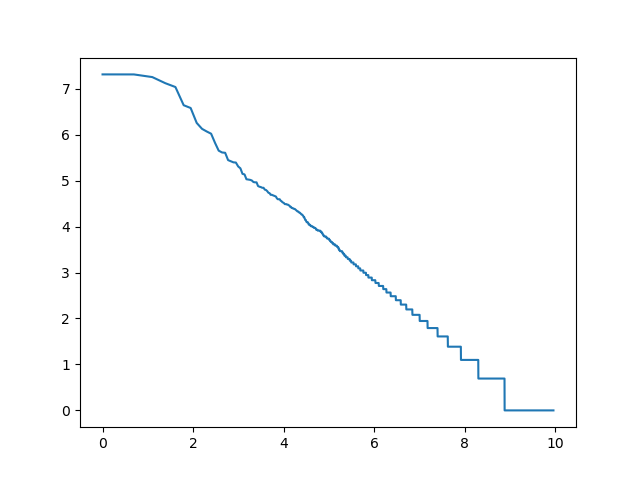

In [1]:
import matplotlib.pyplot as plt
from math import log

def log_rang_log_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot([log(x) for x in range(1, len(freq.values())+1)], [log(y) for y in freq.values()])

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

log_rang_log_freq('pt-words-log-log', get_words(pan_tadeusz))

#### Związek między frekwencją a długością



Powiązane z prawem Zipfa prawo językowe opisuje zależność między
częstością użycia słowa a jego długością. Generalnie im krótsze słowo, tym częstsze.



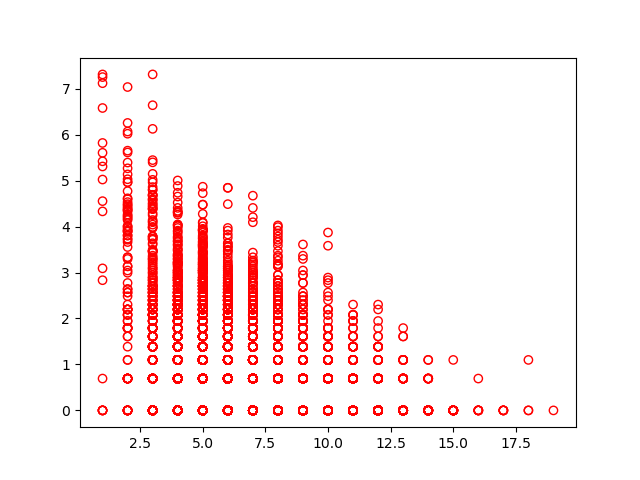

In [1]:
def freq_vs_length(name, g, top=None):
    freq = freq_list(g)

    plt.figure().clear()
    plt.scatter([len(x) for x in freq.keys()], [log(y) for y in freq.values()],
                facecolors='none', edgecolors='r')

    fname = f'02_Jezyki/{name}.png'

    plt.savefig(fname)

    return fname

freq_vs_length('pt-lengths', get_words(pan_tadeusz))

### N-gramy



W modelowaniu języka często rozpatruje się n-gramy, czyli podciągi o
rozmiarze $n$.

Na przykład *digramy* (*bigramy*) to zbitki dwóch jednostek, np. liter albo wyrazów.

| $n$|$n$-gram|nazwa|
|---|---|---|
| 1|1-gram|unigram|
| 2|2-gram|digram/bigram|
| 3|3-gram|trigram|
| 4|4-gram|tetragram|
| 5|5-gram|pentagram|

**Pytanie:** Jak nazywa się 6-gram?

Jak widać, dla symetrii mówimy czasami o unigramach, jeśli operujemy
po prostu na jednostkach, nie na ich podciągach.



#### N-gramy z Pana Tadeusza



Statystyki, które policzyliśmy dla pojedynczych liter czy wyrazów możemy powtórzyć dla n-gramów.



In [1]:
def ngrams(iter, size):
  ngram = []
  for item in iter:
     ngram.append(item)
     if len(ngram) == size:
        yield tuple(ngram)
        ngram = ngram[1:]

list(ngrams("kotek", 3))

[('k', 'o', 't'), ('o', 't', 'e'), ('t', 'e', 'k')]

Zauważmy, że policzyliśmy wszystkie n-gramy, również częściowo pokrywające się.

Zawsze powinniśmy się upewnić, czy jest jasne, czy chodzi o n-gramy znakowe czy wyrazowe



#### 3-gramy znakowe



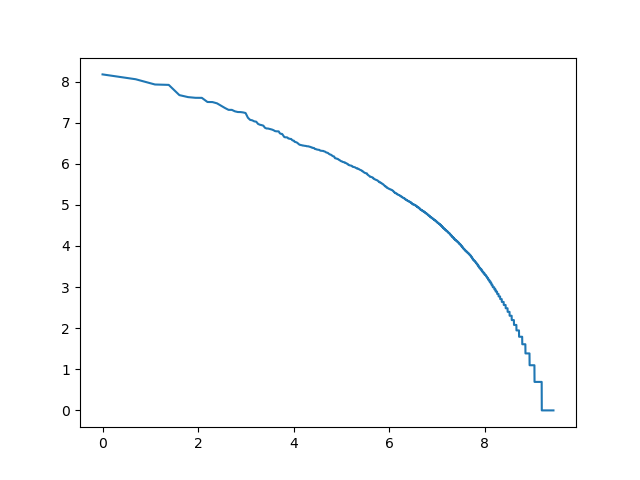

In [1]:
log_rang_log_freq('pt-3-char-ngrams-log-log', ngrams(get_characters(pan_tadeusz), 3))

#### 2-gramy wyrazowe



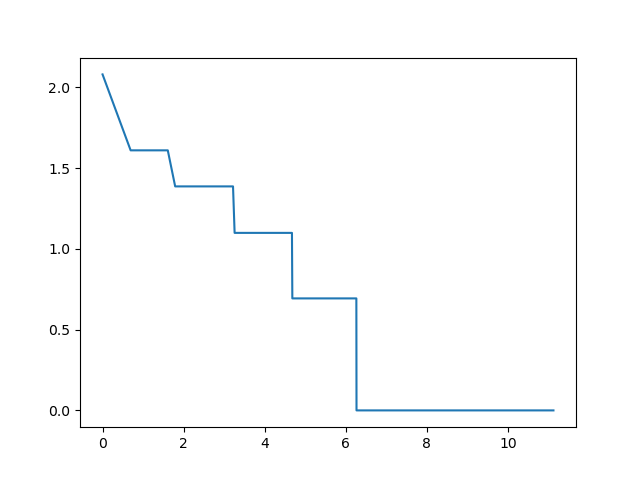

In [1]:
log_rang_log_freq('pt-2-word-ngrams-log-log', ngrams(get_words(pan_tadeusz), 3))

### Tajemniczy język Manuskryptu Wojnicza



[Manuskrypt Wojnicza](https://pl.wikipedia.org/wiki/Manuskrypt_Wojnicza) to powstały w XV w. manuskrypt spisany w
tajemniczym alfabecie, do dzisiaj nieodszyfrowanym. Rękopis stanowi
jedną z największych zagadek historii (i lingwistyki).

![Źródło](./02_Jezyki/voynich135.jpg)

Sami zbadajmy statystyczne własności tekstu manuskryptu. Użyjmy
transkrypcji Vnow, gdzie poszczególne znaki tajemniczego alfabetu
zamienione na litery alfabetu łacińskiego, cyfry i gwiazdkę. Jak
transkrybować manuskrypt, pozostaje sprawą dyskusyjną, natomiast wybór
takiego czy innego systemu transkrypcji nie powinien wpływać
dramatycznie na analizę statystyczną.



In [1]:
import requests

voynich_url = 'http://www.voynich.net/reeds/gillogly/voynich.now'
voynich = requests.get(voynich_url).content.decode('utf-8')

voynich = re.sub(r'\{[^\}]+\}|^<[^>]+>|[-# ]+', '', voynich, flags=re.MULTILINE)

voynich = voynich.replace('\n\n', '#')
voynich = voynich.replace('\n', ' ')
voynich = voynich.replace('#', '\n')

voynich = voynich.replace('.', ' ')

voynich[100:150]

9 OR 9FAM ZO8 QOAR9 Q*R 8ARAM 29 [O82*]OM OPCC9 OP

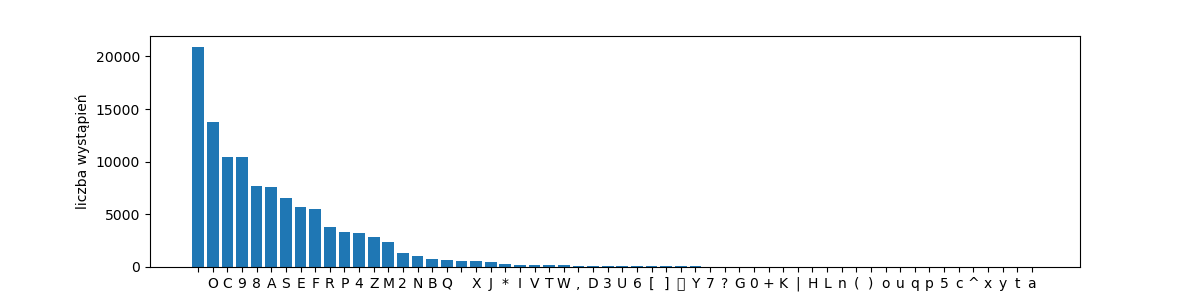

In [1]:
rang_freq_with_labels('voy-chars', get_characters(voynich))

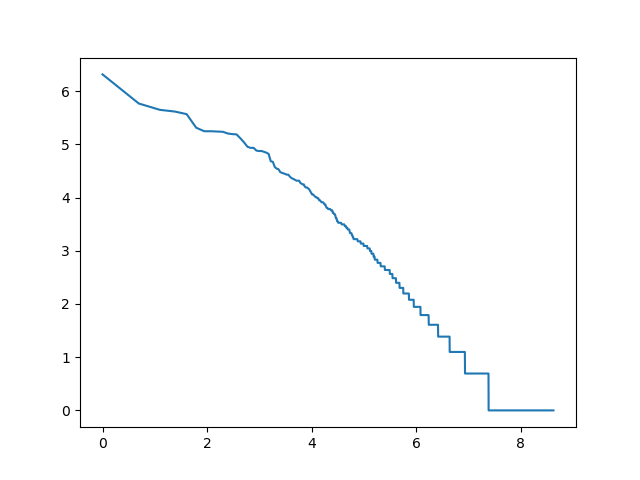

In [1]:
log_rang_log_freq('voy-log-log', get_words(voynich))

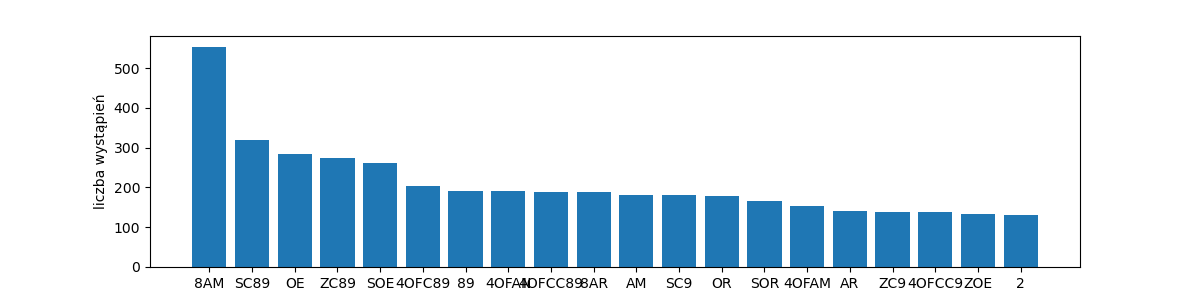

In [1]:
rang_freq_with_labels('voy-words-20', get_words(voynich), top=20)

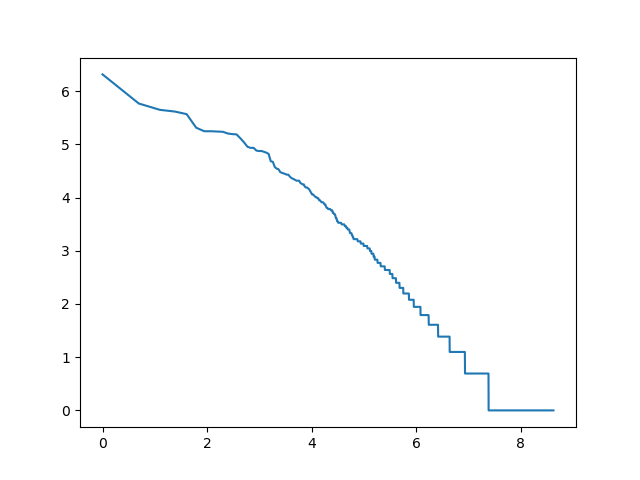

In [1]:
log_rang_log_freq('voy-words-log-log', get_words(voynich))

### Język DNA



Kod genetyczny przejawia własności zaskakująco podobne do języków naturalnych.
Przede wszystkim ma charakter dyskretny, genotyp to ciąg symboli ze skończonego alfabetu.
Podstawowe litery są tylko cztery, reprezentują one nukleotydy, z których zbudowana jest nić DNA:
a, g, c, t.



In [1]:
import requests

dna_url = 'https://raw.githubusercontent.com/egreen18/NanO_GEM/master/rawGenome.txt'
dna = requests.get(dna_url).content.decode('utf-8')

dna = ''.join(dna.split('\n')[1:])
dna = dna.replace('N', 'A')

dna[0:100]

TATAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTA

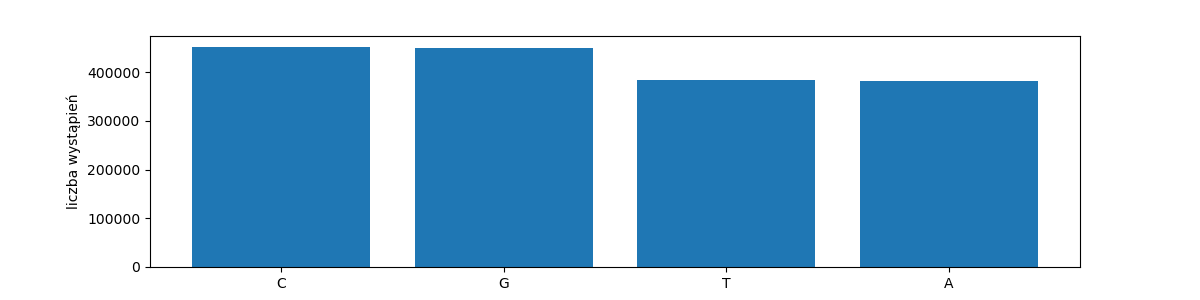

In [1]:
rang_freq_with_labels('dna-chars', get_characters(dna))

#### Tryplety — znaczące cząstki genotypu



Nukleotydy rzeczywiście są jak litery, same w sobie nie niosą
znaczenia. Dopiero ciągi trzech nukleotydów, *tryplety*, kodują jeden
z dwudziestu aminokwasów.



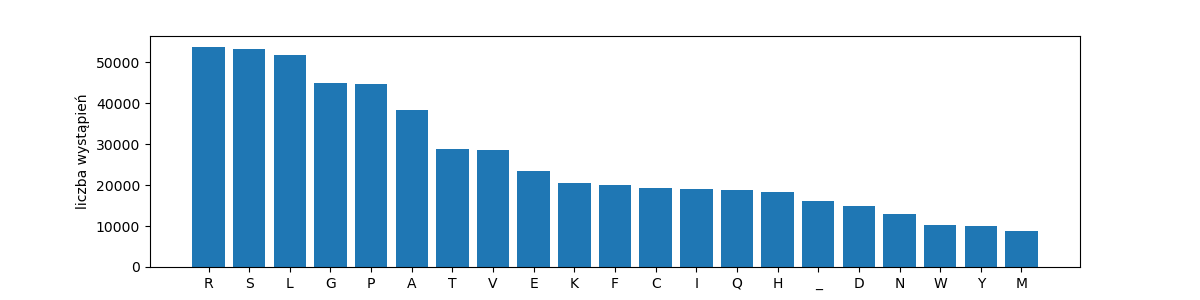

In [1]:
genetic_code = {
     'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
     'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
     'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
     'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
     'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
     'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
     'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
     'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
     'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
     'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
     'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
     'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
     'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
     'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
     'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
     'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
  }

def get_triplets(t):
  for triplet in re.finditer(r'.{3}', t):
    yield genetic_code[triplet.group(0)]

rang_freq_with_labels('dna-aminos', get_triplets(dna))

#### „Zdania” w języku DNA



Z aminokwasów zakodowanych przez tryplet budowane są białka.
Maszyneria budująca białka czyta sekwencję aż do napotkania
trypletu STOP (\_ powyżej). Taka sekwencja to *gen*.



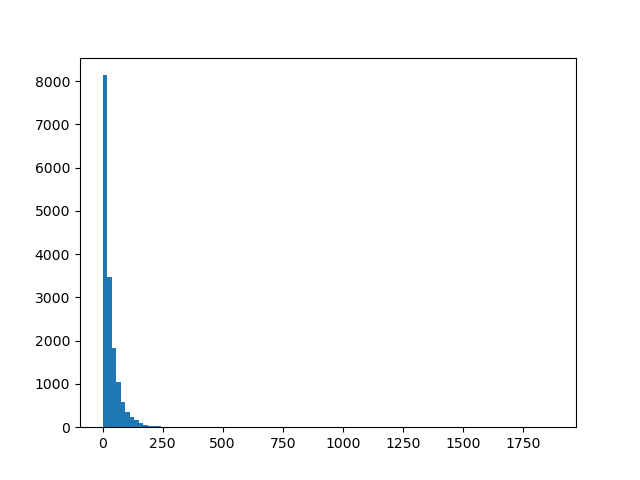

In [1]:
def get_genes(triplets):
  gene = []
  for ammino in triplets:
    if ammino == '_':
       yield gene
       gene = []
    else:
       gene.append(ammino)

plt.figure().clear()
plt.hist([len(g) for g in get_genes(get_triplets(dna))], bins=100)

fname = '02_Jezyki/dna_length.png'

plt.savefig(fname)

fname

### Entropia



**Entropia** ($E$) to miara nieuporządkowania, niepewności, niewiedzy. Im
większa entropia, tym mniej wiemy. Pojęcie to pierwotnie wywodzi się z
termodynamiki, później znaleziono wiele zaskakujących analogii i zastosowań w
innych dyscyplinach nauki.



#### Entropia w fizyce



W termodynamice entropia jest miarą nieuporządkowania układów
fizycznych, na przykład pojemników z gazem. Przykładowo, wyobraźmy
sobie dwa pojemniki z gazem, w którym panuje różne temperatury.

![img](./02_Jezyki/gas-low-entropy.drawio.png)

Jeśli usuniemy przegrodę między pojemnikami, temperatura się wyrówna,
a uporządkowanie się zmniejszy.

![img](./02_Jezyki/gas-high-entropy.drawio.png)

Innymi słowy, zwiększy się stopień nieuporządkowania układu, czyli właśnie entropia.



#### II prawo termodynamiki



Jedno z najbardziej fundamentalnych praw fizyki, II prawo
termodynamiki głosi, że w układzie zamkniętym entropia nie spada.

****Pytanie****: Czy to, że napisałem te materiały do wykładu i
*uporządkowałem* wiedzę odnośnie do statystycznych własności języka, nie
jest sprzeczne z II prawem termodynamiki?

Konsekwencją II prawa termodynamiki jest śmierć cieplna Wszechświata
(zob. [wizualizacja przyszłości Wszechświata]([https://www.youtube.com/watch?v=uD4izuDMUQA](https://www.youtube.com/watch?v=uD4izuDMUQA))).



#### Entropia w teorii informacji



Pojęcie entropii zostało „odkryte” na nowo przez Claude'a Shannona,
gdy wypracował ogólną teorię informacji.

Teoria informacji zajmuje się między innymi zagadnieniem optymalnego kodowania komunikatów.

Wyobraźmy sobie pewne źródło (generator) losowych komunikatów z
zamkniętego zbioru symboli ($\Sigma$; nieprzypadkowo używamy oznaczeń
z poprzedniego wykładu). Nadawca $N$ chce przesłać komunikat o wyniku
losowania do odbiorcy $O$ używając zer i jedynek (bitów).
Teorioinformacyjną entropię można zdefiniować jako średnią liczbę
bitów wymaganych do przesłania komunikatu.

![img](./02_Jezyki/communication.drawio.png)



#### Obliczanie entropii — proste przykłady



Załóżmy, że nadawca chce przekazać odbiorcy informację o wyniku rzutu monetą.
Entropia wynosi wówczas rzecz jasna 1 — na jedno losowanie wystarczy jeden bit
(informację o tym, że wypadł orzeł, możemy zakodować na przykład za pomocą zera,
zaś to, że wypadła reszka — za pomocą jedynki).

Rozpatrzmy przypadek, gdy nadawca rzuca ośmiościenną kością. Aby przekazać
wynik, potrzebuje wówczas 3 bity (a więc entropia ośmiościennej kości
wynosi 3 bity). Przykładowe kodowanie może mieć następującą postać:

| Wynik|Kodowanie|
|---|---|
| 1|001|
| 2|010|
| 3|011|
| 4|100|
| 5|101|
| 6|110|
| 7|111|
| 8|000|



#### Obliczenie entropii — trudniejszy przykład



Załóżmy, że $\Sigma = \{A, B, C, D\}$, natomiast poszczególne komunikaty
są losowane zgodnie z następującym rozkładem prawdopodobieństwa:
$P(A)=1/2$, $P(B)=1/4$, $P(C)=1/8$, $P(D)=1/8$. Ile wynosi entropia w
takim przypadku? Można by sądzić, że 2, skoro wystarczą 2 bity do
przekazania wyniku losowania przy zastosowaniu następującego kodowania:

| Wynik|Kodowanie|
|---|---|
| A|00|
| B|01|
| C|10|
| D|11|

Problem w tym, że w rzeczywistości nie jest to *optymalne* kodowanie.
Możemy sprytnie zmniejszyć średnią liczbę bitów wymaganych do
przekazania losowego wyniku przypisując częstszym wynikom krótsze
kody, rzadszym zaś — dłuższe. Oto takie optymalne kodowanie:

| Wynik|Kodowanie|
|---|---|
| A|0|
| B|10|
| C|110|
| D|111|

Używając takiego kodowanie średnio potrzebujemy:

$$\frac{1}{2}1 + \frac{1}{4}2 + \frac{1}{8}3 + \frac{1}{8}3 = 1,75$$

bita. Innymi słowy, entropia takiego źródła wynosi 1,75 bita.



#### Kodowanie musi być jednoznaczne!



Można by sądzić, że da się stworzyć jeszcze krótsze kodowanie dla omawianego rozkładu nierównomiernego:

| Wynik|Kodowanie|
|---|---|
| A|0|
| B|1|
| C|01|
| D|11|

Niestety, nie jest to właściwe rozwiązanie — kodowanie musi być
jednoznaczne nie tylko dla pojedynczego komunikatu, lecz dla całej sekwencji.
Na przykład ciąg 0111 nie jest jednoznaczny przy tym kodowaniu (ABBB czy CD?).
Podane wcześniej kodowanie spełnia warunek jednoznaczności, ciąg 0111 można odkodować tylko
jako AD.



#### Ogólny wzór na entropię.



Na podstawie poprzedniego przykładu można dojść do intuicyjnego wniosku, że
optymalny kod dla wyniku o prawdopodobieństwie $p$ ma długość $-\log_2(p)$, a zatem ogólnie
entropia źródła o rozkładzie prawdopodobieństwa $\{p_1,\ldots,p_|\Sigma|\}$ wynosi:

$$E = -\sum_{i=1}^{|\Sigma|} p_i\log_2(p_i)$$.

Zauważmy, że jest to jeden z nielicznych przypadków, gdy w nauce naturalną
podstawą logarytmu jest 2 zamiast… podstawy logarytmu naturalnego ($e$).

Teoretycznie można mierzyć entropię używając logarytmu naturalnego
($\ln$), jednostką entropii będzie wówczas **nat** zamiast bita,
niewiele to jednak zmienia i jest mniej poręczne i trudniejsze do interpretacji
(przynajmniej w kontekście informatyki) niż operowanie na bitach.

****Pytanie**** Ile wynosi entropia zwykłej sześciennej kostki? Jak wygląda
optymalne kodowanie wyników rzutu taką kostką?



#### Entropia dla próby Bernoulliego



Wiemy już, że entropia dla rzutu monetą wynosi 1 bit. A jaki będzie wynik dla źle wyważonej monety?



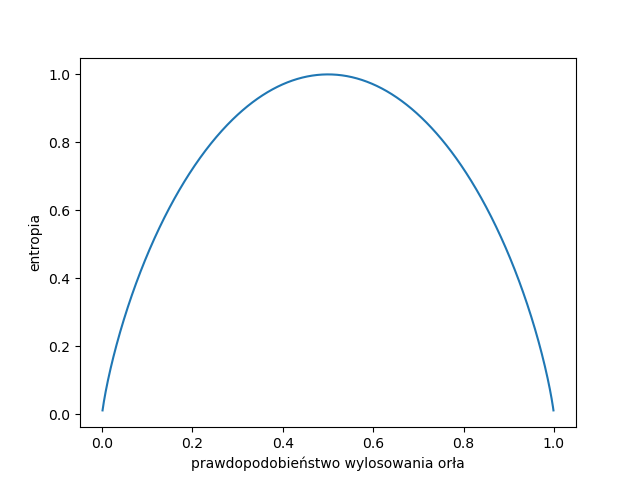

In [1]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

def binomial_entropy(p):
  return -(p * log(p, 2) + (1-p) * log(1-p, 2))

x = list(np.arange(0.001,1,0.001))
y = [binomial_entropy(x) for x in x]
plt.figure().clear()
plt.xlabel('prawdopodobieństwo wylosowania orła')
plt.ylabel('entropia')
plt.plot(x, y)

fname = f'02_Jezyki/binomial-entropy.png'

plt.savefig(fname)

fname

**Pytanie** Dla oszukańczej monety (np. dla której wypada zawsze orzeł) entropia
wynosi 0, czy to wynik zgodny z intuicją?



### Entropia a język



Tekst w danym języku możemy traktować jako ciąg symboli (komunikatów) losowanych według jakiegoś
rozkładu prawdopodobieństwa. W tym sensie możemy mówić o entropii języka.

Oczywiście, jak zawsze, musimy jasno stwierdzić, czym są symbole
języka: literami, wyrazami czy jeszcze jakimiś innymi jednostkami.



#### Pomiar entropii języka — pierwsze przybliżenie



Załóżmy, że chcemy zmierzyć entropię języka polskiego na przykładzie
„Pana Tadeusza” — na poziomie znaków. W pierwszym przybliżeniu można
by policzyć liczbę wszystkich znaków…



In [1]:
chars_in_pan_tadeusz = len(set(get_characters(pan_tadeusz)))
chars_in_pan_tadeusz

95

… założyć jednostajny rozkład prawdopodobieństwa i w ten sposób policzyć entropię:



In [1]:
from math import log

95 * (1/95) * log(95, 2)

6.569855608330948

#### Mniej rozrzutne kodowanie



Przypomnijmy sobie jednak, że rozkład jednostek języka jest zawsze
skrajnie nierównomierny! Jeśli uwzględnić ten nierównomierny rozkład
znaków, można opracować o wiele efektywniejszy sposób zakodowania znaków składających się na „Pana Tadeusza”
(częste litery, np. „a” i „e” powinny mieć krótkie kody, a rzadkie, np. „ź” — dłuższe).

Policzmy entropię przy takim założeniu:



In [1]:
from collections import Counter
from math import log

def unigram_entropy(t):
  counter = Counter(t)

  total = counter.total()
  return -sum((p := count / total) * log(p, 2) for count in counter.values())

unigram_entropy(get_characters(pan_tadeusz))

4.938605272823633

(Jak dowiemy się na kolejnym wykładzie, zastosowaliśmy tutaj **unigramowy model języka**).



#### Ile wynosi entropia rękopisu Wojnicza?



In [1]:
unigram_entropy(get_characters(voynich))

3.902708104423842

#### Rzeczywista entropia?



W rzeczywistości entropia jest jeszcze mniejsza, tekst nie jest
generowany przecież według rozkładu wielomianowego. Istnieją rzecz
jasna pewne zależności między znakami, np. niemożliwe, żeby po „ń”
wystąpiły litera „a” czy „e”. Na poziomie wyrazów zależności mogę mieć
jeszcze bardziej skrajny charakter, np. po wyrazie „przede” prawie na
pewno wystąpi „wszystkim”, co oznacza, że w takiej sytuacji słowo
„wszystkim” może zostać zakodowane za pomocą 0 (!) bitów.

Można uwzględnić takie zależności i uzyskać jeszcze lepsze kodowanie,
a co za tym idzie lepsze oszacowanie entropii. (Jak wkrótce się
dowiemy, oznacza to użycie digramowego, trigramowego, etc. modelu języka).



#### Rozmiar skompresowanego pliku jako przybliżenie entropii



Celem algorytmów kompresji jest właściwie wyznaczanie efektywnych
sposobów kodowania danych. Możemy więc użyć rozmiaru skompresowanego pliku w bitach
(po podzieleniu przez oryginalną długość) jako dobrego przybliżenia entropii.



In [1]:
import zlib

def entropy_by_compression(t):
  compressed = zlib.compress(t.encode('utf-8'))
  return 8 * len(compressed) / len(t)

entropy_by_compression(pan_tadeusz)

3.673019884633768

Dla porównania wynik dla rękopisu Wojnicza:



In [1]:
entropy_by_compression(voynich)

2.942372881355932

#### Gra Shannona



Innym sposobem oszacowania entropii tekstu jest użycie… ludzi. Można poprosić rodzimych użytkowników
danego języka o przewidywanie kolejnych liter (bądź wyrazów) i w ten sposób oszacować entropię.

**Projekt** Zaimplementuj aplikację webową, która umożliwi „rozegranie” gry Shannona.

